In [4]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [26]:
combined = pd.concat([train.drop("rainfall",axis=1), test], axis=0)


In [27]:
def describe(df):
  desc=pd.DataFrame()
  desc['dtype']=df.dtypes
  desc['null']=df.isnull().sum()
  desc['%null'] = desc['null'] / len(df) * 100
  # desc['mean']=df.mean()
  # desc['median']=df.median()
  #desc['%unique'] = desc['nunique'] /len(df)*100
  desc = pd.concat([desc,df.describe(include = 'all').T],axis=1).sort_values(by='null',ascending=False)
  desc['count']=df.count()
  desc['unique']=df.nunique()
  # desc['freq/mean']=desc['freq'].fillna(desc['mean']).drop(['freq','mean'],axis=1)
  display(desc)
describe(combined)

,dtype,null,%null,count,mean,std,min,25%,50%,75%,max,unique
winddirection,float64,1,0.034247,2919,104.628400,80.415535,10.0,40.00,70.0,200.00,300.0,35
id,int64,0,0.000000,2920,1459.500000,843.075718,0.0,729.75,1459.5,2189.25,2919.0,2920
day,int64,0,0.000000,2920,180.711301,105.252537,1.0,89.75,180.0,271.00,365.0,365
pressure,float64,0,0.000000,2920,1013.577363,5.617592,999.0,1008.60,1013.0,1017.70,1034.6,244
maxtemp,float64,0,0.000000,2920,26.367466,5.657912,7.4,21.30,27.8,31.20,36.0,226
temparature,float64,0,0.000000,2920,23.955616,5.235483,5.9,19.40,25.5,28.40,31.8,206
mintemp,float64,0,0.000000,2920,22.155137,5.086431,4.0,17.70,23.9,26.40,29.8,205
dewpoint,float64,0,0.000000,2920,20.455959,5.313356,-0.3,16.80,22.2,25.00,26.7,227
humidity,float64,0,0.000000,2920,82.194863,7.808651,39.0,77.00,82.0,88.00,98.0,50
cloud,float64,0,0.000000,2920,75.881507,18.002503,0.0,69.00,83.0,88.00,100.0,81


In [ ]:
combined

(730, 12)

In [ ]:
k=0
for i in range(1,366):
    c=train[train['day']==i]['id'].count()
    if c  < 6:
        display(train[train['day']==i])
        break

        k+=1
print(k)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
37,37,38,1021.8,21.1,18.2,17.8,16.9,74.0,44.0,9.5,20.0,26.7,0
402,402,38,1013.0,24.5,22.8,20.9,20.3,86.0,92.0,0.0,70.0,15.7,1
767,767,38,1020.6,21.2,18.2,17.3,14.6,79.0,83.0,2.2,20.0,17.3,1
1497,1497,38,1020.2,21.2,18.9,17.2,15.0,74.0,35.0,9.8,30.0,18.6,0
1862,1862,38,1020.6,25.1,21.8,19.2,16.4,71.0,88.0,0.6,20.0,40.0,1


0


In [29]:
k=0
# for i in range(1,366):
#     c=train[train['day']==i]['id'].count()
#     if c == 8:
#         display(train[train['day']==i])

#         k+=1
# print(k)
for i in range(0,366):
    for j in range(0,6):
        if train[(train["id"]==j*365 + i) & (train['day']==i+1)].empty:
           k+=1
           if  train[train["id"]==j*365 + i].empty:
            continue
           else:
            # display(train[train["id"]==j*365 + i])
            # train.loc[train["id"] == j*365 + i, "error"] = "group_2"
            train.loc[train["id"] == j*365 + i, "day"] =i+1
            k+=1
print(k)
# print(train['error'].fillna(value="group_1" ,inplace=True))
k=0
for i in range(0,366):
    for j in range(0,6):
        if train[(train["id"]==j*365 + i) & (train['day']==i+1)].empty:
           k+=1
           if  train[train["id"]==j*365 + i].empty:
            continue
           else:
            k+=1
print(k)




81
11


In [28]:
test.tail()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
725,2915,361,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3
726,2916,362,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2
727,2917,363,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9
728,2918,364,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5
729,2919,365,1020.9,22.2,18.8,17.0,13.3,79.0,89.0,0.2,60.0,50.6


In [ ]:
test.shape

(730, 12)

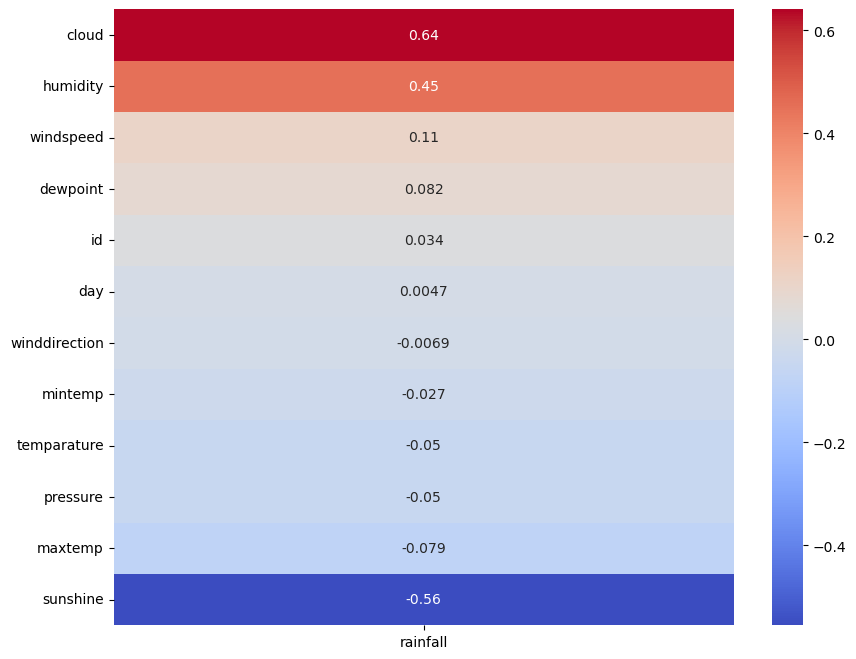

In [ ]:
correlation_matrix = train.drop('error',axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['rainfall']].drop('rainfall').sort_values(by='rainfall', ascending=False), annot=True, cmap='coolwarm')
plt.show()

NameError: name 'xtr' is not defined

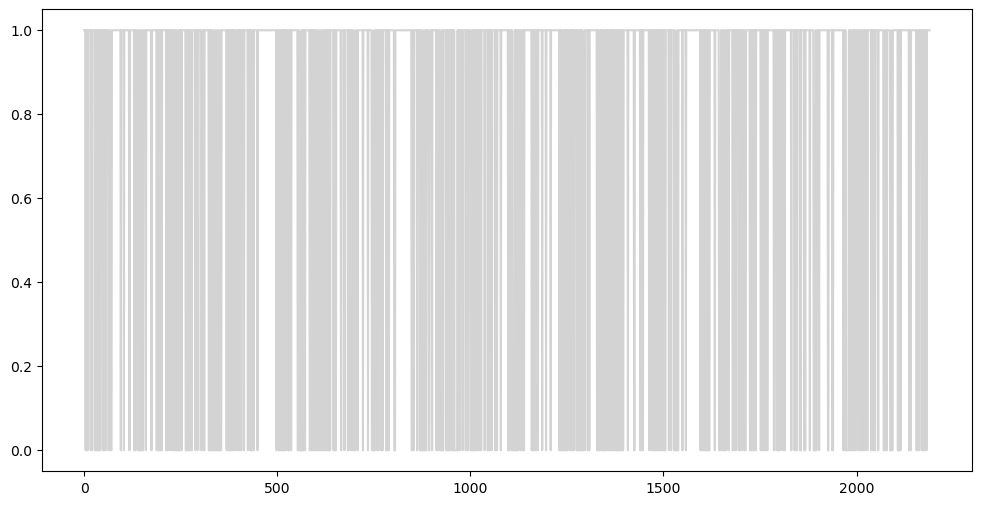

In [30]:
import matplotlib.pyplot as plt

# Assuming train has a datetime index or sequential index
plt.figure(figsize=(12, 6))

# Plot the full dataset's 'rainfall' in light gray
plt.plot(train.index, train['rainfall'], color='lightgray', label="Full Dataset")

# Plot the training data (ytr) in blue, using the corresponding index from xtr
plt.plot(xtr.index, ytr, color='blue', label="Training Data")

# Plot the testing data (yte) in red, using the corresponding index from xte
plt.plot(xte.index, yte, color='red', label="Testing Data")

# Add labels and a title
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.title('Train-Test Split for Time Series Data (Shuffle=False)')

# Add a legend
plt.legend()

# Show the plot
plt.show()



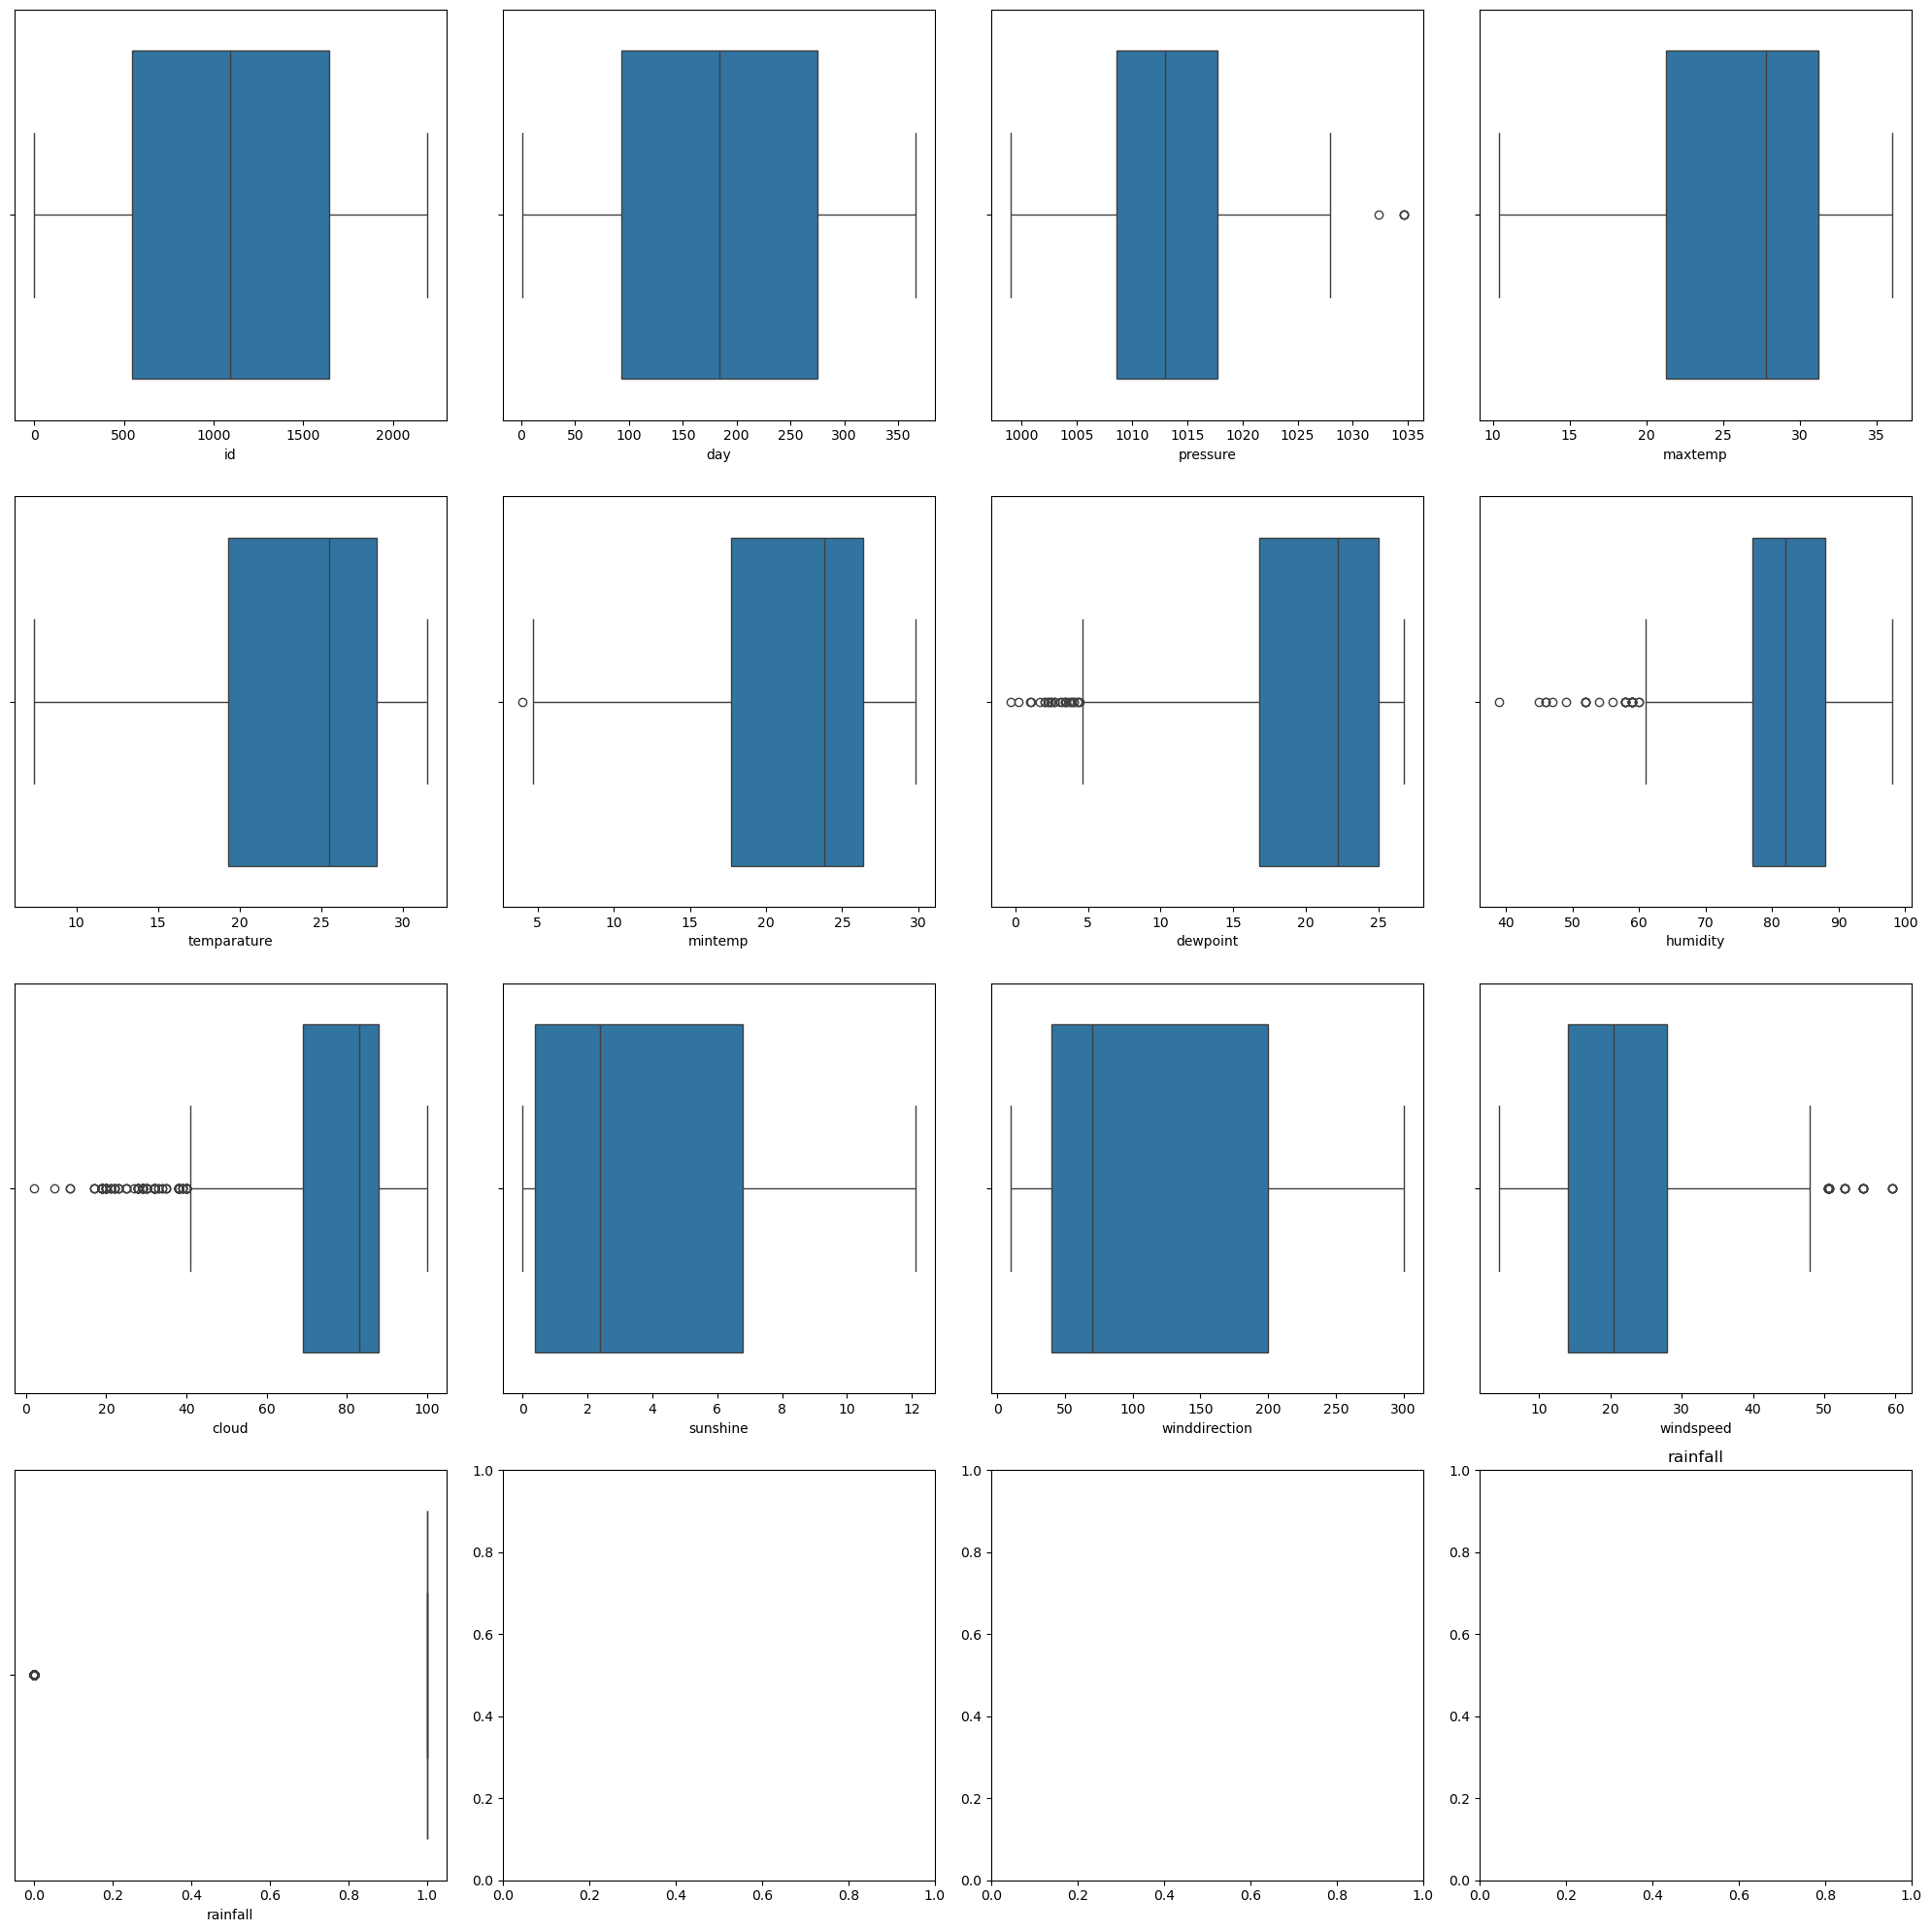

In [44]:
fig,ax=plt.subplots(4,4,figsize=(20,20))
ax=ax.flatten()
i=0
for cols in train.columns:
    if i<len(ax):
        sns.boxplot(data=train,x=train[cols],ax=ax[i])
        plt.title(cols)
        i+=1
plt.tight_layout()
plt.show()

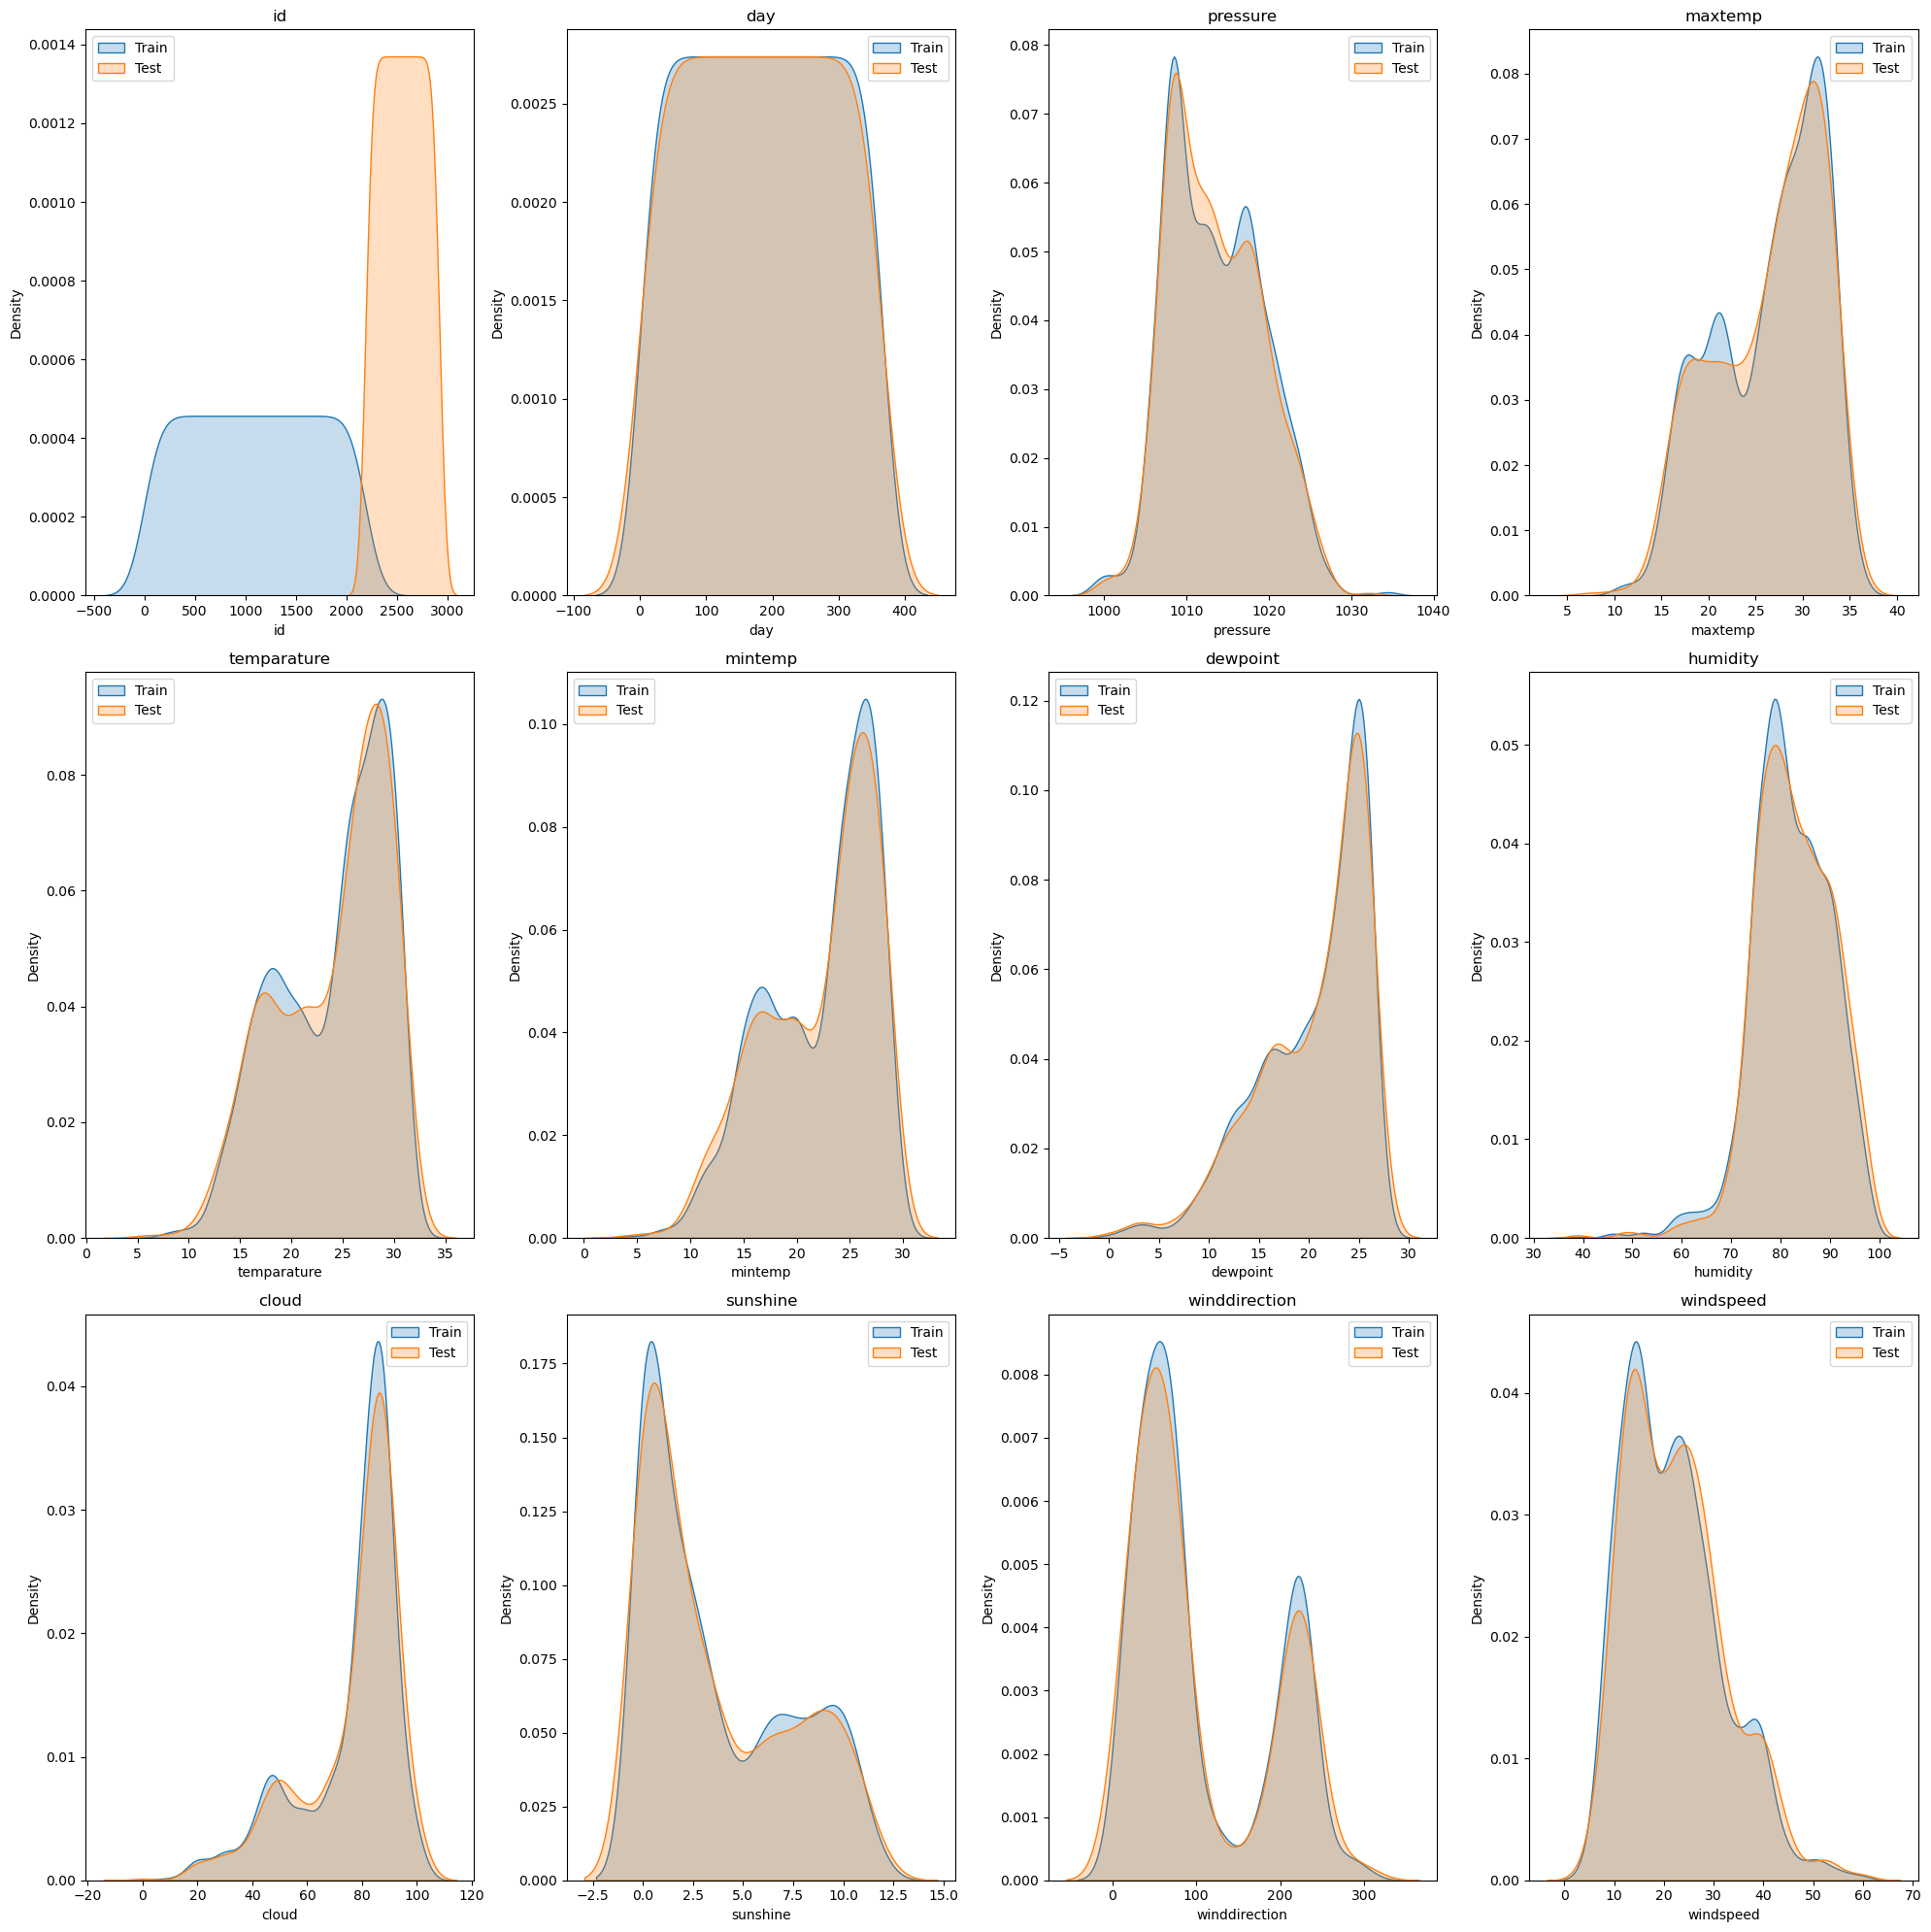

In [45]:
fig, ax = plt.subplots(3, 4, figsize=(20, 20))
ax = ax.flatten()
i = 0
for col in train.columns:
    if col != 'rainfall':
        sns.kdeplot(data=train, x=col, ax=ax[i], label="Train", fill=True)
        sns.kdeplot(data=test, x=col, ax=ax[i], label="Test", fill=True)
        ax[i].set_title(col)
        ax[i].legend()
        i += 1
plt.tight_layout()

for j in range(i, len(ax)):
    ax[j].axis("off")

plt.show()

In [43]:
import numpy as np
from scipy import stats
z_scores = np.abs(stats.zscore(train))

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 2
outliers = (z_scores > threshold)
min_outliers = 5  # Change this value to the desired number of outlier features

# Count the number of outlier features in each row
outlier_count = outliers.sum(axis=1)

# Get rows where the count of outlier features is greater than or equal to min_outliers
outlier_rows = train[outlier_count >= min_outliers]
# # Get the rows with outliers
# outlier_rows = train[outliers.all(axis=1)]
print("Outliers based on Z-score method:")
display(outlier_rows)

Outliers based on Z-score method:


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
65,65,66,1022.7,14.3,12.8,10.0,8.0,63.0,95.0,0.1,20.0,24.5,1
383,383,19,1034.6,11.2,10.4,7.0,3.4,77.0,95.0,0.0,40.0,16.0,1
384,384,20,1025.3,12.9,8.3,7.5,4.4,47.0,23.0,8.8,10.0,31.8,0
759,759,30,1021.4,14.5,12.9,10.5,4.3,70.0,19.0,2.3,20.0,21.3,0
1100,1100,6,1020.6,17.6,13.2,11.2,6.8,59.0,25.0,2.4,20.0,33.5,0
1111,1111,17,1025.9,10.9,8.6,7.0,1.0,73.0,67.0,2.5,50.0,30.3,0
1464,1464,5,1027.1,10.8,7.4,8.1,2.5,61.0,95.0,0.1,20.0,24.0,1
1466,1466,7,1027.4,10.4,10.4,8.1,2.2,77.0,92.0,0.0,60.0,39.5,1
1475,1475,16,1023.3,15.3,13.3,10.6,3.2,72.0,22.0,9.2,20.0,44.7,0
1479,1479,20,1023.6,12.5,10.4,8.8,6.2,72.0,20.0,9.1,20.0,33.4,0


In [ ]:
for c in FEATURES:

    # PLOT TRAIN DISTRIBUTION COMPARED WITH TEST DISTRIBUTION
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.distplot(train[c],label='train')
    sns.distplot(test[c],label='test')
    plt.legend()
    plt.title(f"{c}")    

    # PLOT TARGET RELATIONSHIP WITH BINNED NUMERIC FEATURES
    plt.subplot(1,2,2)
    train['bucket'], bin_edges = pd.cut(train[c], bins=10, retbins=True, labels=False)
    bucket_means = train.groupby('bucket')['rainfall'].mean()
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_midpoints, bucket_means, marker='o', linestyle='-')
    plt.xlabel(f'{c} (Binned)')
    plt.ylabel('Mean Rainfall')
    plt.title(f'Mean Rainfall per {c} (train)')
    plt.xticks(bin_midpoints, rotation=45)
    plt.grid()
    
    plt.show()

In [39]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the outlier step as 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
min_outliers = 5  # Change this value to the desired number of outlier features

# Count the number of outlier features in each row
outlier_count = outliers.sum(axis=1)

# Get rows where the count of outlier features is greater than or equal to min_outliers
outlier_rows = train[outlier_count >= min_outliers]

# Display the rows with outliers
print(f"Rows with at least {min_outliers} outlier features:")
display(outlier_rows)

Rows with at least 5 outlier features:


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
1840,1840,16,1034.6,10.4,8.7,7.0,2.4,46.0,19.0,10.0,20.0,34.3,0


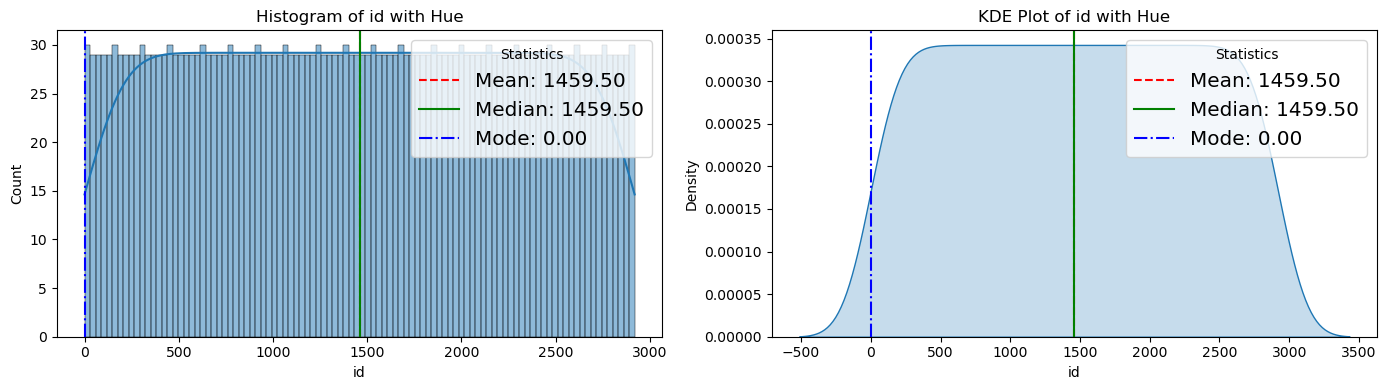

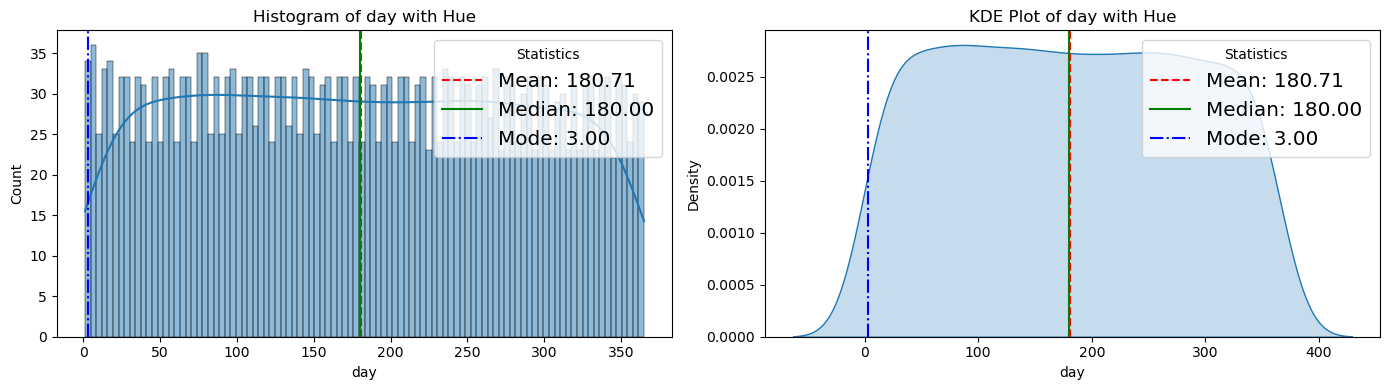

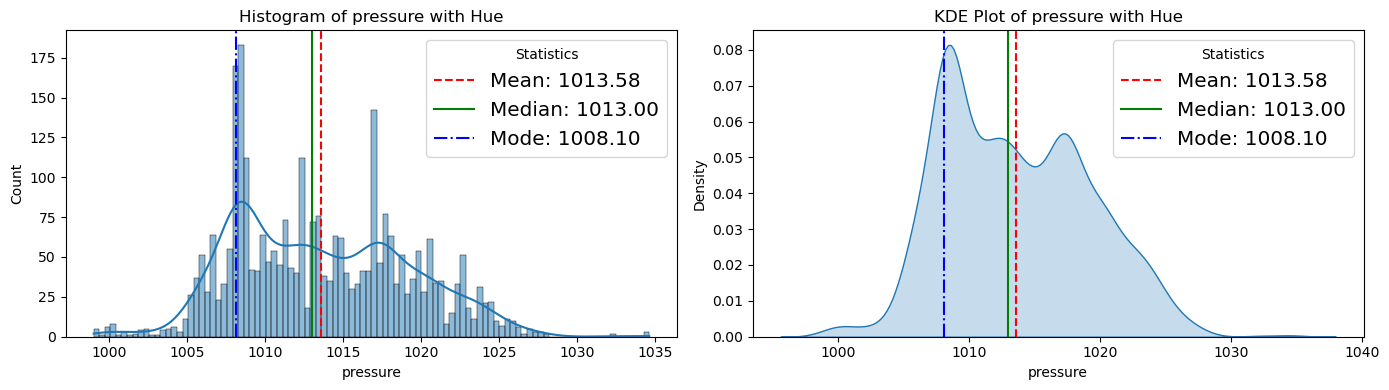

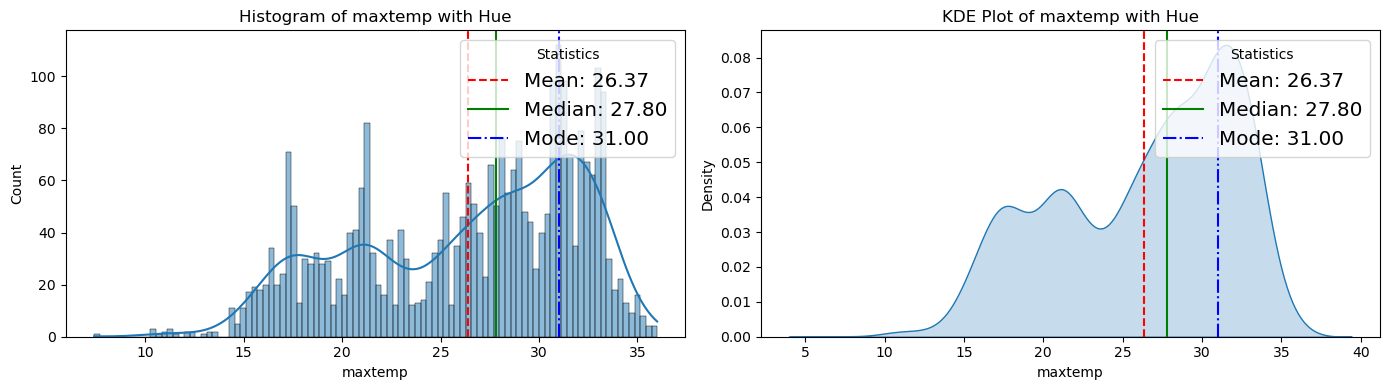

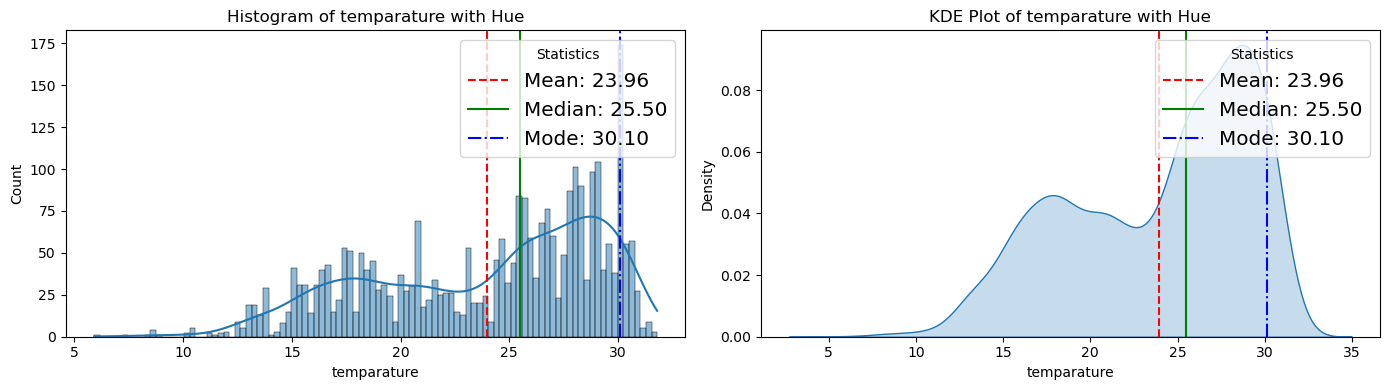

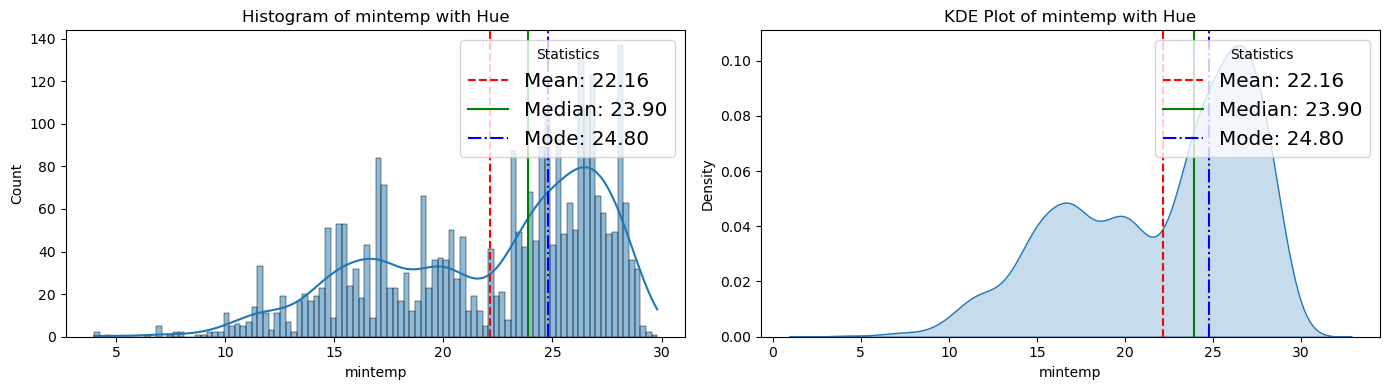

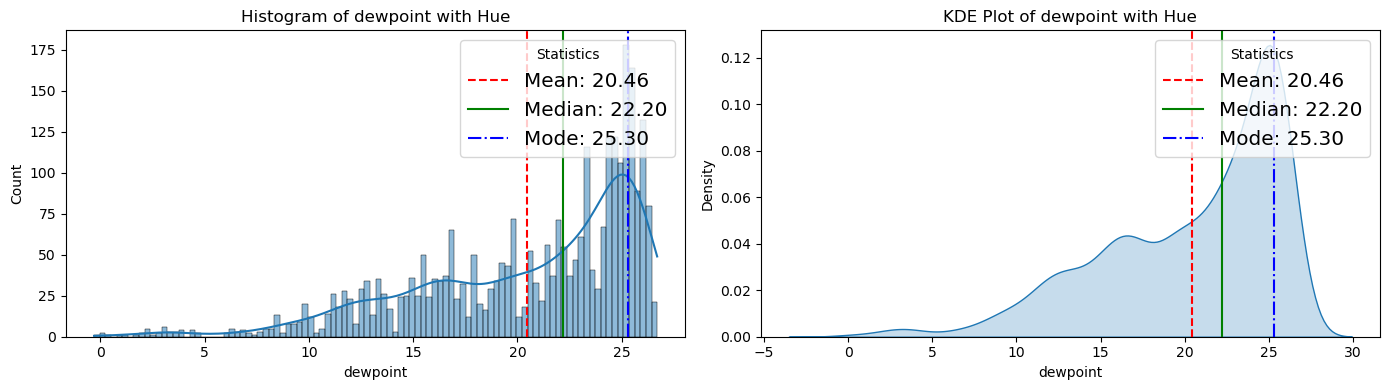

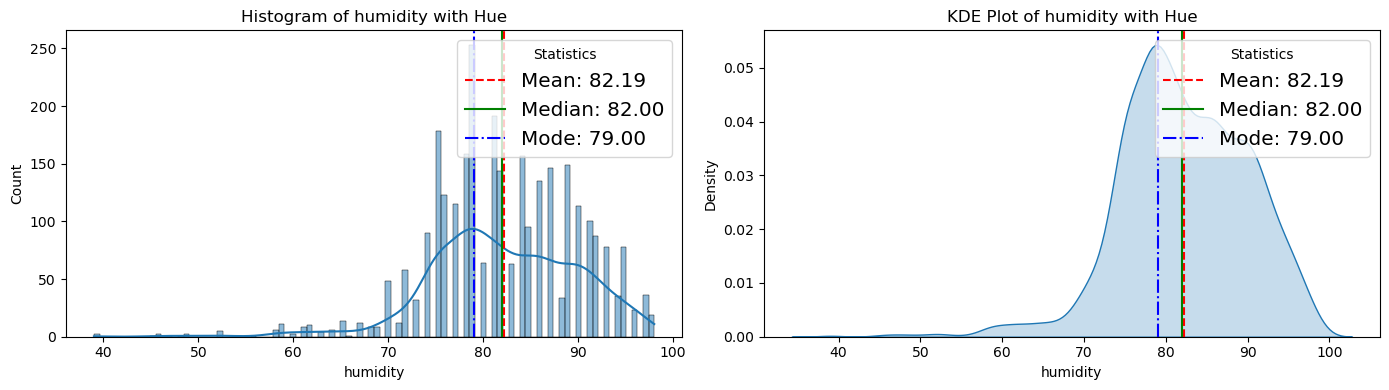

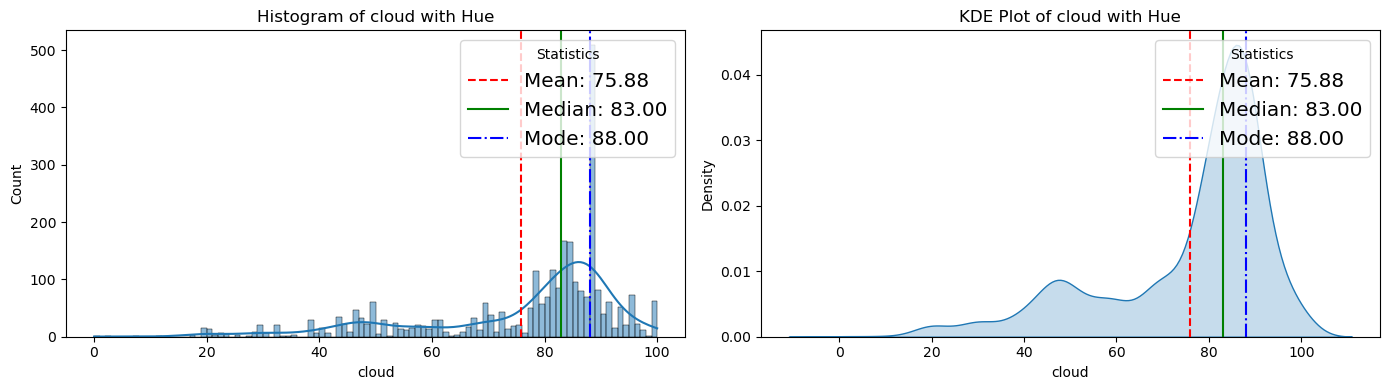

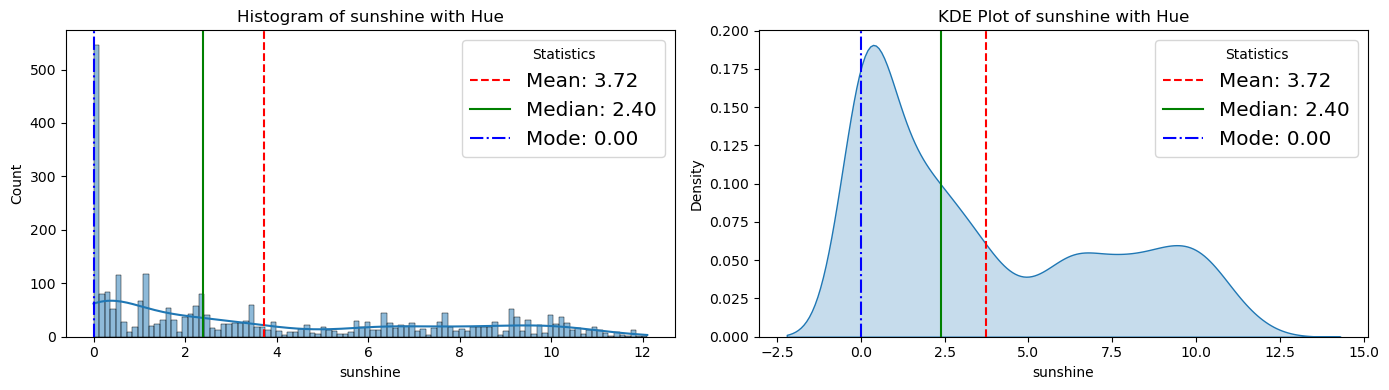

ValueError: cannot reindex on an axis with duplicate labels

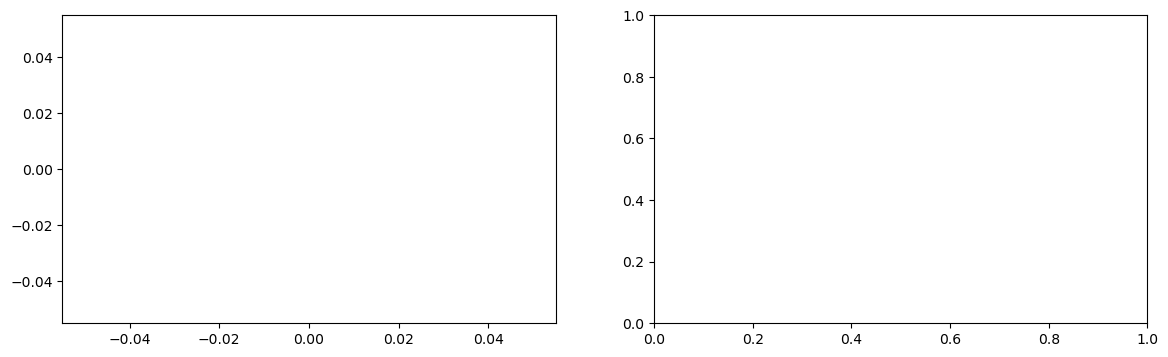

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# @title continuous feature distributions with mean, median, and mode
def target3_plot(column, train):
    import warnings
    warnings.filterwarnings("ignore")
    
    hue_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
    
    # Calculate mean, median, and mode
    mean_value = train[column].mean()
    median_value = train[column].median()
    mode_value = train[column].mode()[0]  # mode() returns a Series, we select the first mode

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))  # Create subplots with 1 row and 2 columns

    # Plot histogram with hue
    sns.histplot(data=train, x=column, hue_order=hue_columns, bins=100, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column} with Hue')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    
    # Add lines for mean, median, and mode on the histogram
    axes[0].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')
    axes[0].axvline(mode_value, color='blue', linestyle='-.', label=f'Mode: {mode_value:.2f}')
    axes[0].legend(title='Statistics', loc='upper right', fontsize="x-large")

    # Plot KDE plot with hue
    sns.kdeplot(data=train, x=column, shade=True, hue_order=hue_columns, ax=axes[1])
    axes[1].set_title(f'KDE Plot of {column} with Hue')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Density')

    # Add lines for mean, median, and mode on the KDE
    axes[1].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[1].axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')
    axes[1].axvline(mode_value, color='blue', linestyle='-.', label=f'Mode: {mode_value:.2f}')
    axes[1].legend(title='Statistics', loc='upper right', fontsize="x-large")

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

# Example usage:
for i in test.columns:
    if i != "error":
        target3_plot(i, combined)


In [ ]:
# a = []

# for j in train.columns:
#     for i in train.columns:
#             if (i, j) not in a and (j, i) not in a and i!=j:
#                 a.append((i, j))                
#                 plt.figure(figsize=(20, 5))
#                 sns.scatterplot(data=train, x=j, y=i, hue='error', s=8)
#                 plt.show()

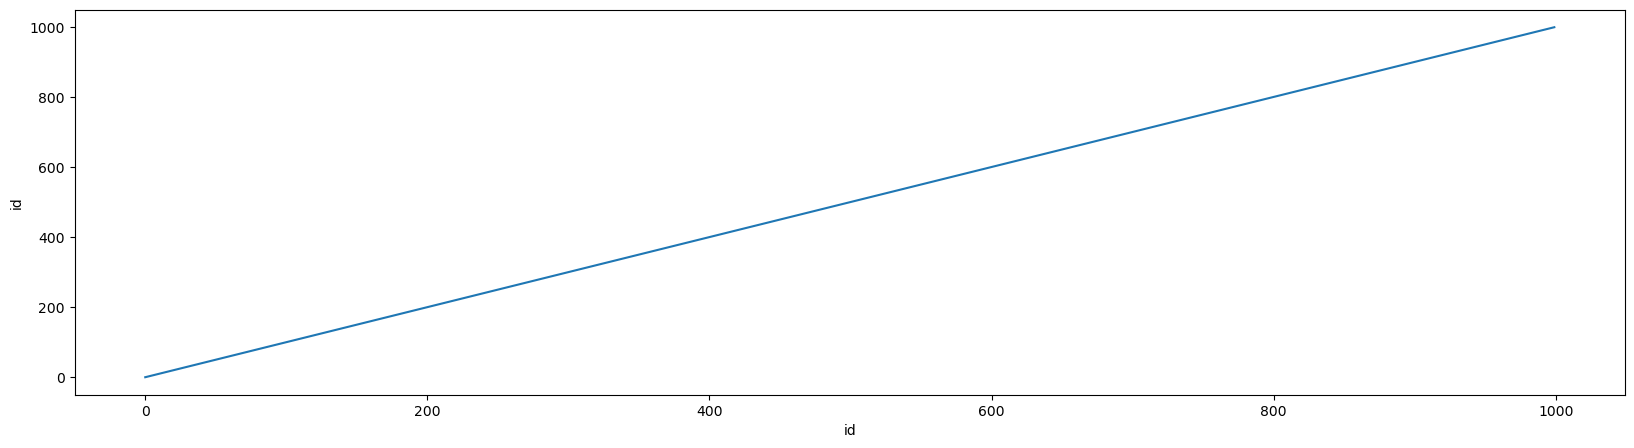

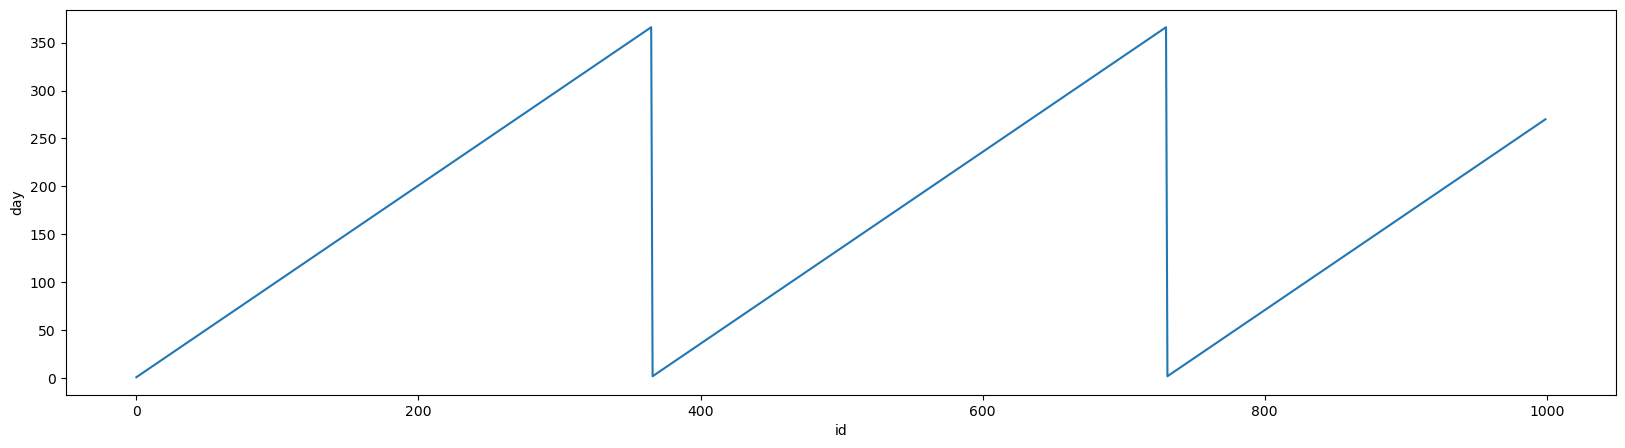

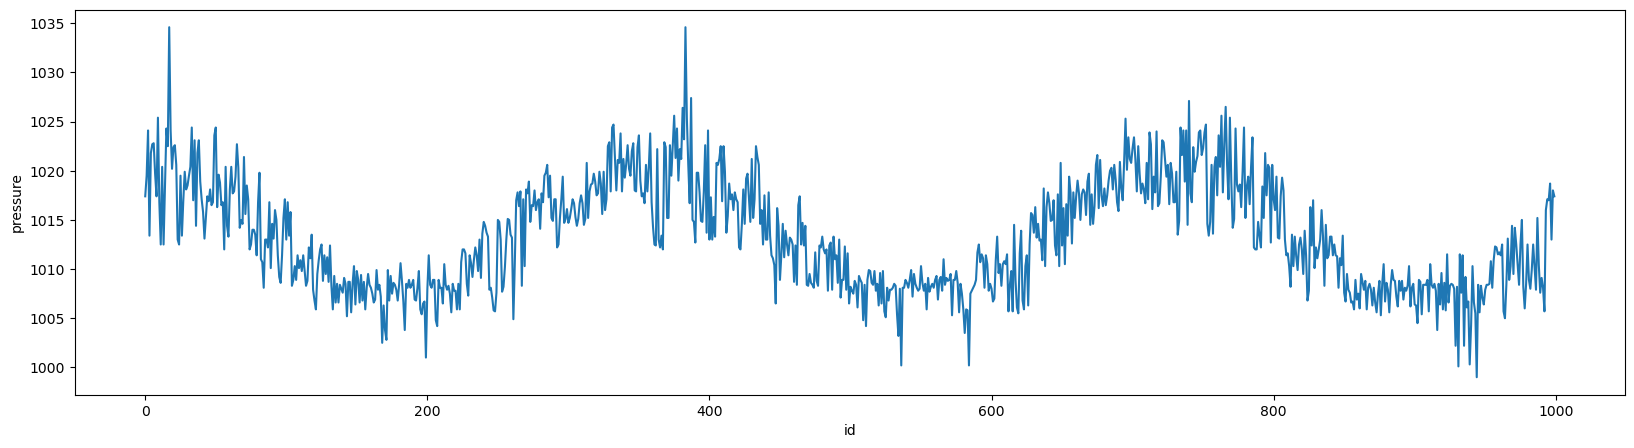

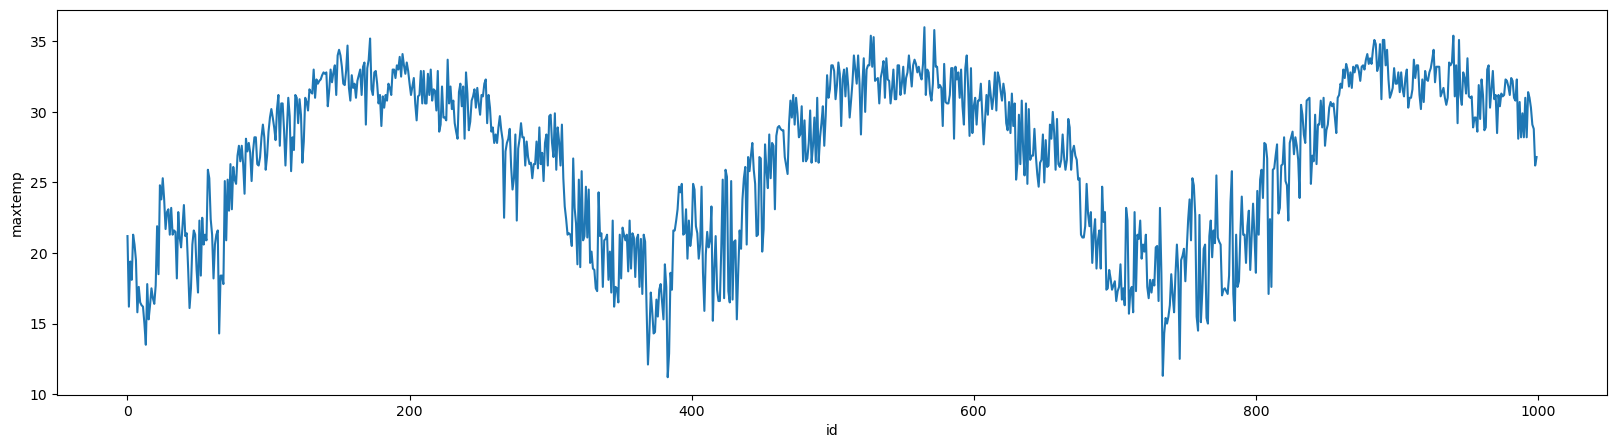

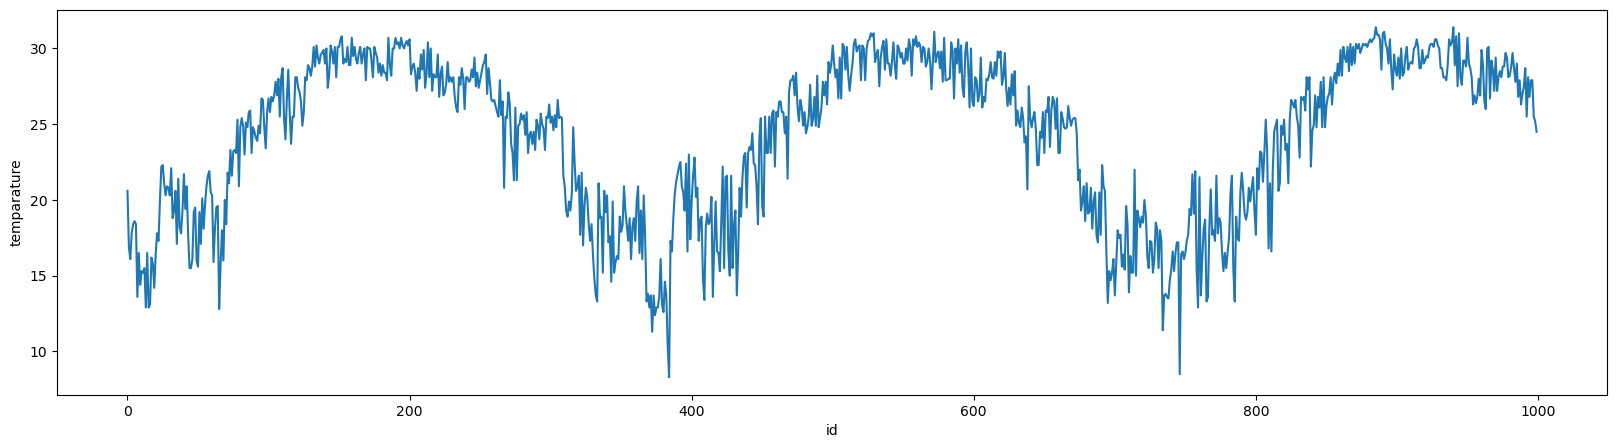

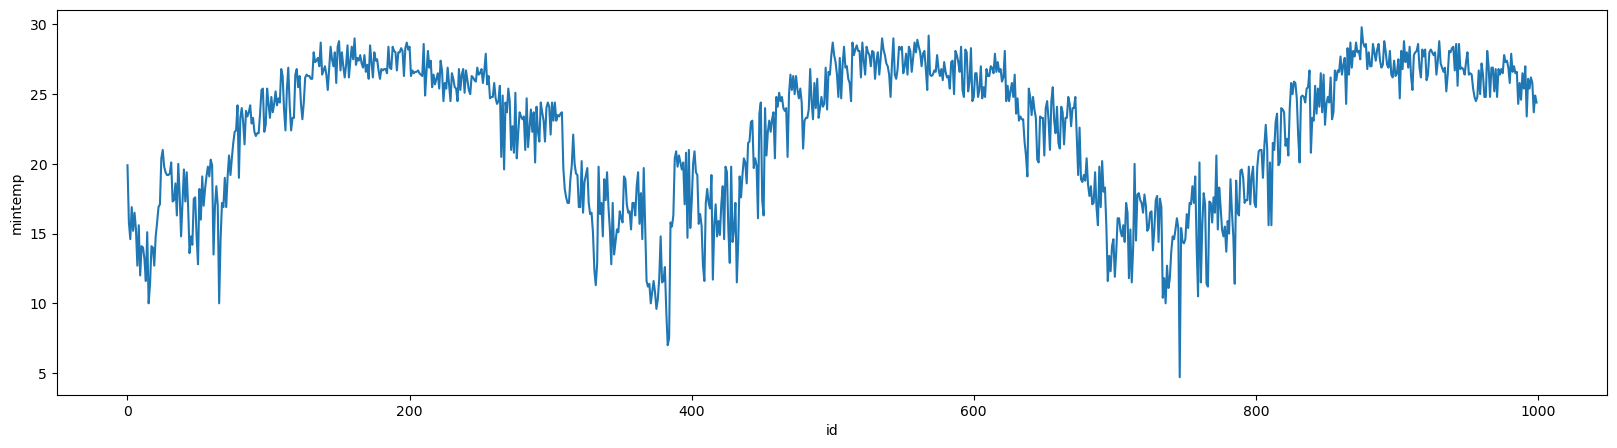

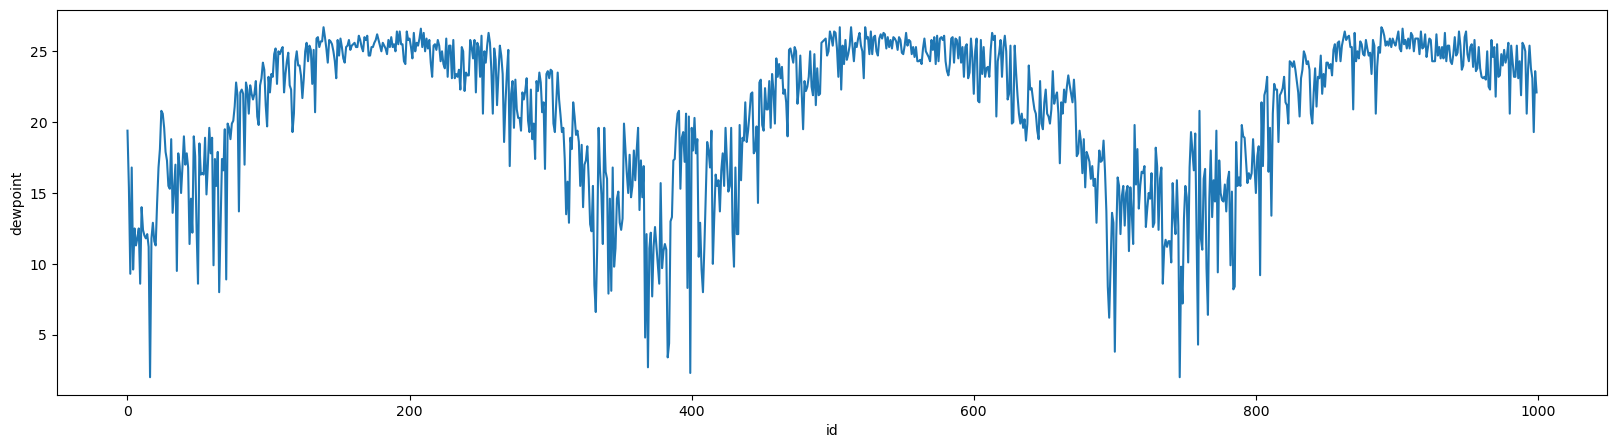

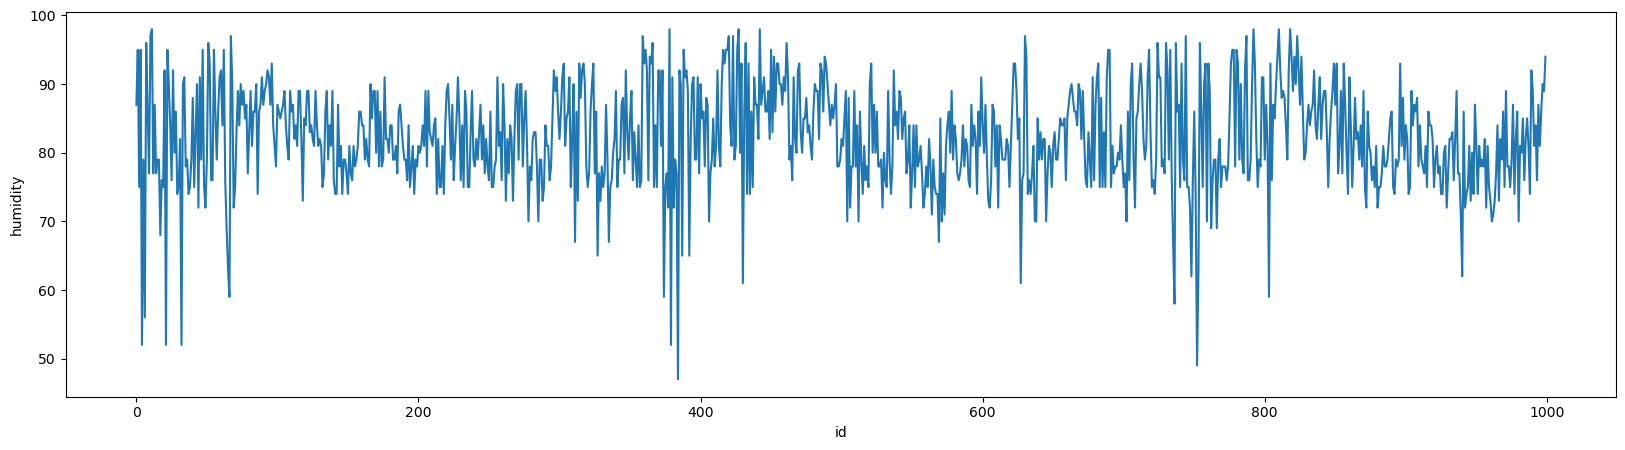

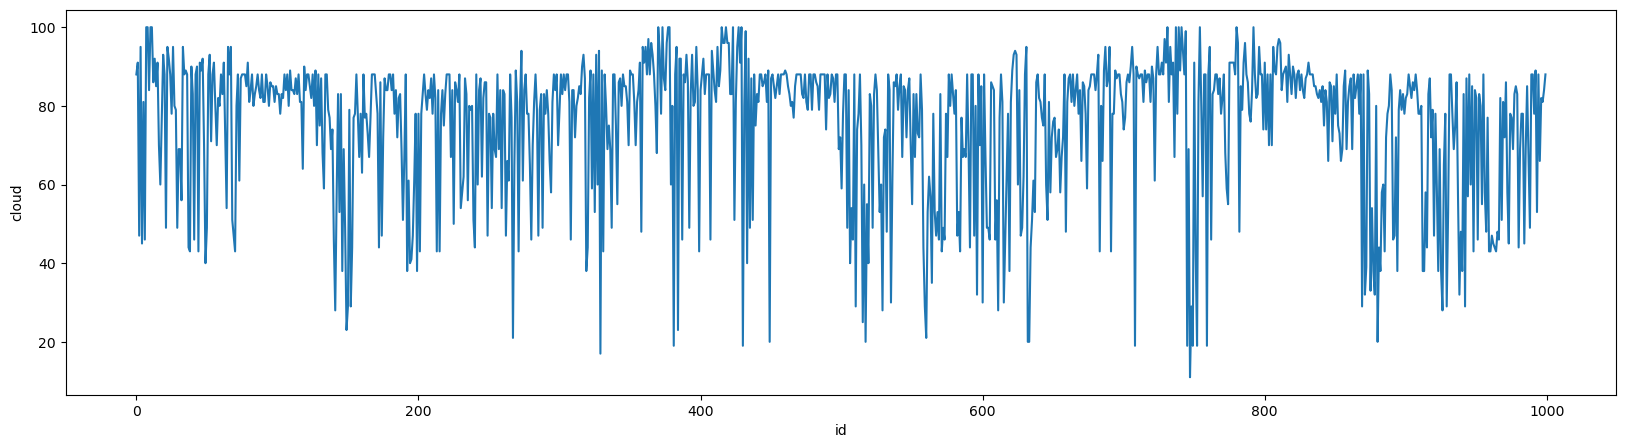

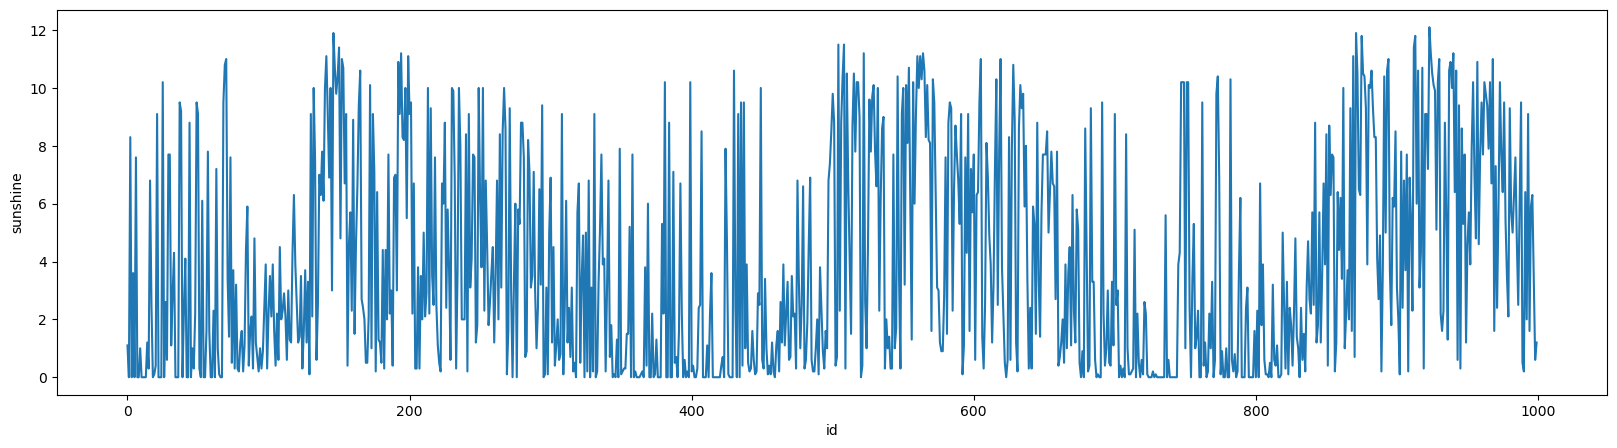

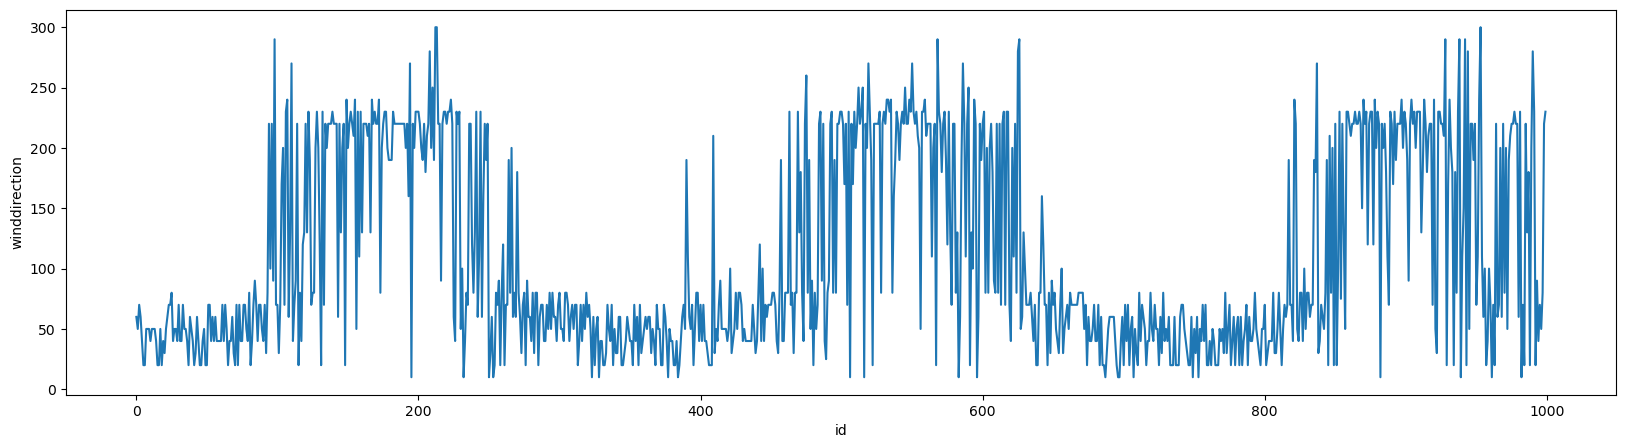

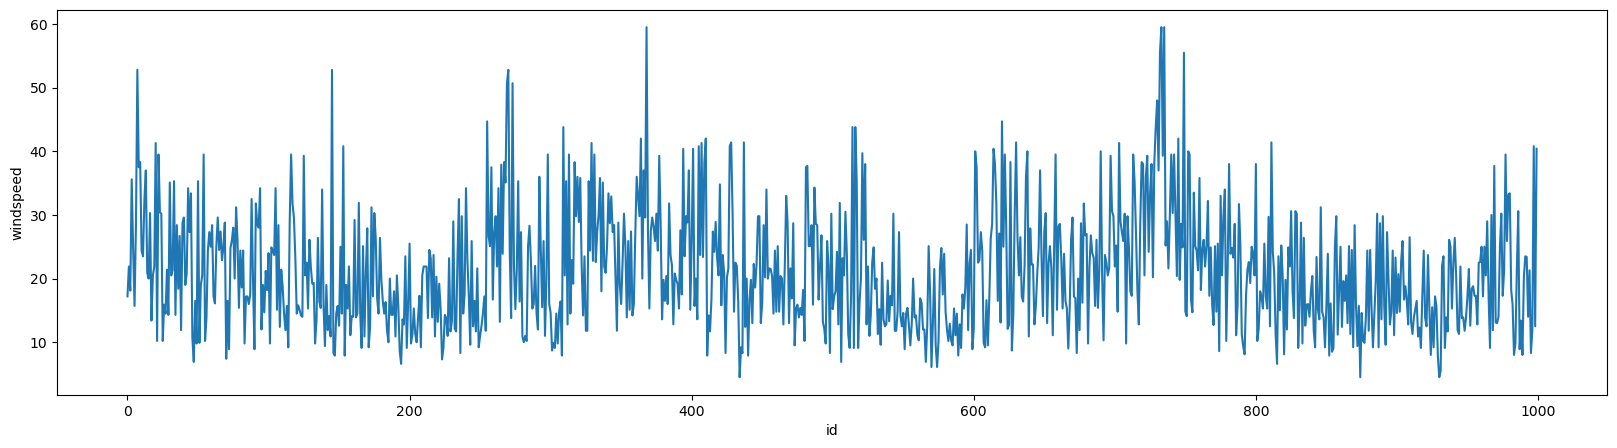

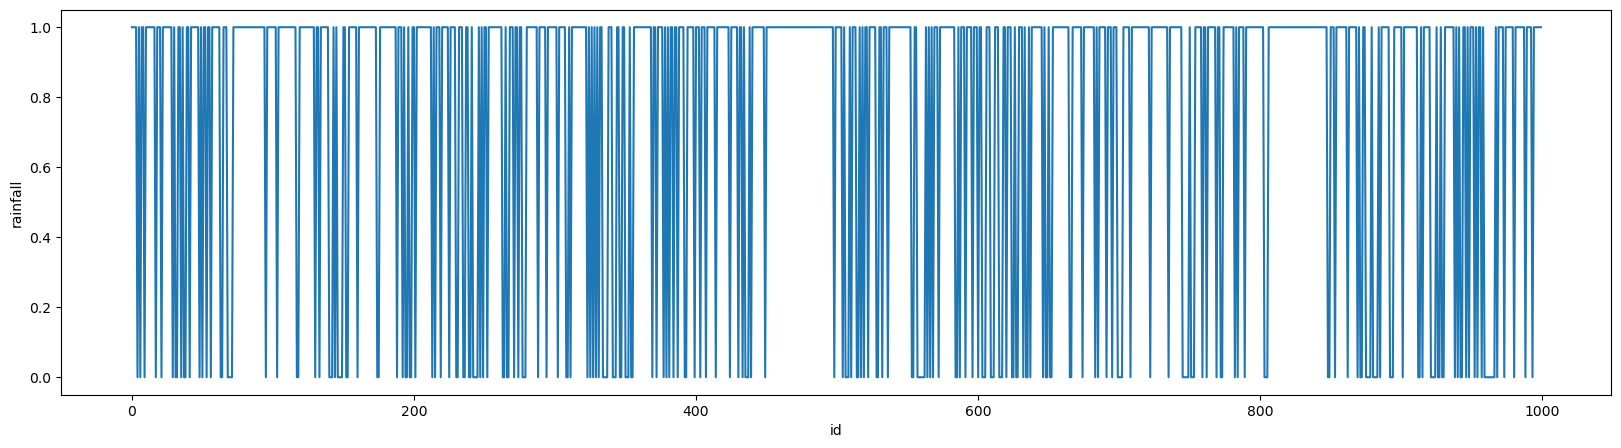

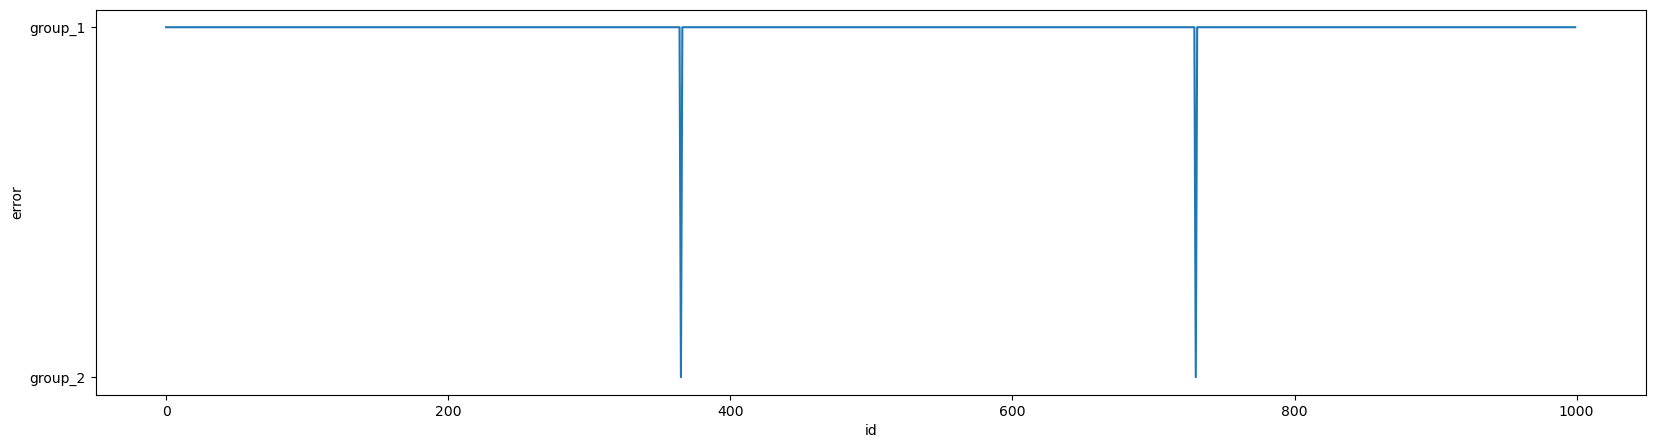

In [ ]:
for i in train.columns:
    plt.figure(figsize=(20, 5))
    sns.lineplot(data=train[0:1000], x='id', y= i)
    plt.show()


In [ ]:

kmeans = KMeans(n_clusters=4)  # We know there are 4 centers in this synthetic dataset
kmeans.fit(xtr)

# Step 4: Get the predicted cluster labels
labels = kmeans.labels_

# Step 5: Visualize the results
plt.scatter(xtr[:, 0], xtr[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Step 6: Get the cluster centers
print("Cluster Centers: ", kmeans.cluster_centers_)

# Optional: If you want to evaluate the clustering performance (inertia or silhouette score)
print("Inertia (Sum of squared distances to the closest centroid): ", kmeans.inertia_)
